In [28]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [29]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784' , version = 1 , as_frame=True)


In [30]:
type(mnist)
X = mnist['data']
y = mnist['target']
type(X)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [31]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


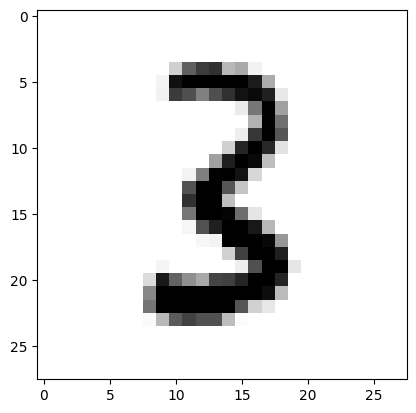

In [32]:
import matplotlib.cm as cm 

plt.imshow(X.iloc[50000].values.reshape(28,28) , cmap = cm.binary , interpolation = "nearest")

In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,  y_test =train_test_split(X, y, test_size=0.2 , random_state=42 , stratify=y)
X_train.shape

(56000, 784)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time 

knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

accuracy_score(y_test , y_pred)

27.737051486968994


0.9696428571428571

In [35]:
y_train.isnull().sum()

np.int64(0)

In [36]:
from sklearn.decomposition import PCA

for i  in range(1 , 784) : 
    pca = PCA(n_components = i) 
    X_train_transformed = pca.fit_transform(X_train)
    X_test_transformed = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_transformed , y_train )

    y_pred = knn.predict(X_test_transformed )

    accuracy_score(y_test , y_pred )

KeyboardInterrupt: 

In [42]:
# Transforming into 2D 
pca = PCA(n_components = 2)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [45]:
X_train_transformed.shape

(56000, 2)

In [52]:
import plotly.express as px 

y_train_transformed = y_train.astype(str)

fig = px.scatter( x = X_train_transformed[: , 0] , y = X_train_transformed[:,1]  , color = y_train_transformed)

fig.show()


In [53]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [54]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [55]:
pca.explained_variance_

array([333666.1555964 , 244952.35768479, 210696.59897127])

In [59]:
pca.components_.shape

(3, 784)